<a href="https://colab.research.google.com/github/manjulamishra/DS-Code-Pandas_Useful_Functions/blob/master/Aggregate_Groupby_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Important Aggregation Functions 

It's important to know how to use different aggregation functions to be able to understand the data you're analyzing. Pandas has many functions to achieve the same objective. You want to use the most efficient functions depending on the situation. 

## Crosstab
https://pbpython.com/pandas-crosstab.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html

In [ ]:
#This will create a frequency table where df.make will create rows
# df.body_style will create columns in crossby table
# the table will summarize how many convertible	hardtop	hatchback	sedan	wagon from these makes 
# e.g mazda, honda etc
pd.crosstab(df.make, df.body_style)

### Same results as above using groupby

In [ ]:
df.groupby(['make', 'body_style'])['body_style'].count().unstack().fillna(0)

### same results using pivot_table

In [ ]:
df.pivot_table(index='make', columns='body_style', aggfunc={'body_style':len},fill_value=0)

## useful changes you can make to the output by altering the parameters

### adding subtotals

**margins** is a key word and it adds margins for a total column and a total row.

In [ ]:
# this will create a column for total
# it will add a single row and show the total in the total column
# it will also add a total row and how each column's total
pd.crosstab(df.make, df.body_style, margins=True, margins_name='Total')

### Value aggregation like mean etc

In [ ]:
# first column is index, second is for column and values= column is the one getting aggfunc applied on
# e.g what is the average weight of honda convertible etc
pd.crosstab(df.make, df.body_style, values=df.curb_weight, aggfunc='mean').round(0)

### Normalization: Getting results in terms of percentage 
When we want to undertand what percentage of time each combnation occured. This is done using the **normalization** parameter:

In [ ]:
# normalize in terms of total i.e. that cell/total 
pd.crosstab(df.make, df.body_style, normalize=True)

In [ ]:
# normalize on columns, the cell/total of that column
pd.crosstab(df.make, df.body_style, normalize='columns')

In [ ]:
# normalize on rows, each row cell/total of that row
pd.crosstab(df.make, df.body_style, normalize='index')

### Converting a True False column into 0/1

In [ ]:
df.column = df.column.astype(int)

### sorting a dataframe
DataFrame.sort_values(self, by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [ ]:
#sort by col1
df.sort_values(by=['col1'])

In [ ]:
# sort by multiple columns
df.sort_values(by=['col1', 'col2'])

In [ ]:
Sort descending
df.sort_values(by='col1', ascending=False)

In [ ]:
# Putting NAs first
df.sort_values(by='col1', ascending=False, na_position='first')

### Conditional *and* vs *&*

If it's a pandas series e.i. a column, use & otherwise use *and*

In [ ]:
# Use & to compare a pandas series
pd.Series([True, True]) & pd.Series([ False, True])

In [ ]:
# use *and* to compare Python list
[True, True, True] and [False, True, True]

## Grouping Using Crosstab

In [ ]:
# the first column df.make creates index while
#  the other two columns in the list create grouping columns
#  i.e. df.body_style is the top column and df.drive_wheels is grouped into categories to 
#  to aggregate individually under each category
pd.crosstab(df.make, [df.body_style, df.drive_wheels])

### Grouping with indexing (sub grouping on rows)

In [ ]:
# this will create a bus categories of rows to be grouped 
pd.crosstab([df.make, df.num_doors], [df.body_style, df.drive_wheels])

In [ ]:
# the rows can be renamed to be more meaningful
# add dropna to either consider dropping them or keeping them
# dropna = False will still keep the rows even when it has all 0s/missing values
pd.crosstab([df.make, df.num_doors], [df.body_style, df.drive_wheels],
           rownames = ['Auto Manufacture', 'Doors'],
           colnames = ['Body Style', 'drive Type'],
           dropna = False)

## Visualization 

we can visualize the results through seaborn heatmap

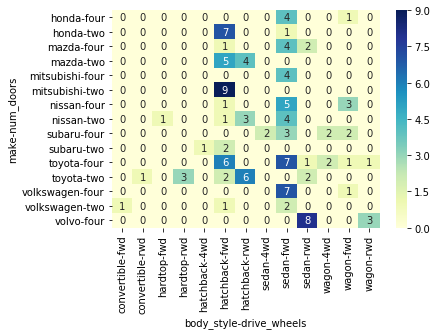

In [ ]:
import seaborn as sns
sns.heatmap(pd.crosstab([df.make, df.num_doors], [df.body_style, df.drive_wheels]),
           cmap= 'YlGnBu',
           annot=True,
           cbar= True);

## other Simple Aggregations

In [ ]:
#  get the total of that column
df.col_name.sum()

In [ ]:
# get the mean of a single column
df.col_name.mean()

In [ ]:
#  mean of the whole df
df.mean()

In [ ]:
# mean of each row
df.mean(axis='columns')

# Aggregation Using groupby 

In [ ]:
df.groupby('column_name1')

In [ ]:
df.groupby('column_name1').sum()

In [ ]:
df.groupby['column_name1']['col_name2'].median()

### Dispatch method

describe() and unstack() 

In [ ]:
df.groupby('col_name1')['col_name2'].describe().unstack()

**-------------------------------------------------------------------------------------------------------------------------**

## Above codes with examples below 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
df_raw = pd.read_csv("http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/imports-85.data",
                     header=None, names=headers, na_values="?" )

# # Define a list of models that we want to review
# models = ["toyota","nissan","mazda", "honda", "mitsubishi", "subaru", "volkswagen", "volvo"]

# # Create a copy of the data with only the top 8 manufacturers
# df = df_raw[df_raw.make.isin(models)].copy()

In [ ]:
df_raw.head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [ ]:
# Define a list of models that we want to review
models = ["toyota","nissan","mazda", "honda", "mitsubishi", "subaru", "volkswagen", "volvo"]

# Create a copy of the data with only the top 8 manufacturers
df = df_raw[df_raw.make.isin(models)].copy()

In [ ]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
30,2,137.0,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,50.8,1713,ohc,four,92,1bbl,2.91,3.41,9.6,58.0,4800.0,49,54,6479.0
31,2,137.0,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,50.8,1819,ohc,four,92,1bbl,2.91,3.41,9.2,76.0,6000.0,31,38,6855.0
32,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,52.6,1837,ohc,four,79,1bbl,2.91,3.07,10.1,60.0,5500.0,38,42,5399.0
33,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,52.6,1940,ohc,four,92,1bbl,2.91,3.41,9.2,76.0,6000.0,30,34,6529.0
34,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,52.6,1956,ohc,four,92,1bbl,2.91,3.41,9.2,76.0,6000.0,30,34,7129.0


In [ ]:
# first column name df.make will create index meaning the rows and
# the second column df.body_style will create those many columns
pd.crosstab(df.make, df.body_style)

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0,0,7,5,1
mazda,0,0,10,7,0
mitsubishi,0,0,9,4,0
nissan,0,1,5,9,3
subaru,0,0,3,5,4
toyota,1,3,14,10,4
volkswagen,1,0,1,9,1
volvo,0,0,0,8,3


### Achieving same task using groupby (a bit more cumbersome)

groupby will also achieve the same result but it's a bit more cumbersome and not that intutive

In [ ]:
df.groupby(['make', 'body_style'])['body_style'].count().unstack().fillna(0)

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0.0,0.0,7.0,5.0,1.0
mazda,0.0,0.0,10.0,7.0,0.0
mitsubishi,0.0,0.0,9.0,4.0,0.0
nissan,0.0,1.0,5.0,9.0,3.0
subaru,0.0,0.0,3.0,5.0,4.0
toyota,1.0,3.0,14.0,10.0,4.0
volkswagen,1.0,0.0,1.0,9.0,1.0
volvo,0.0,0.0,0.0,8.0,3.0


### The same results using pivot_table

In [ ]:
df.pivot_table(index='make', columns='body_style', aggfunc={'body_style':len},fill_value=0)

body_style                              
body_style convertible hardtop hatchback sedan wagon
make                                                
honda                0       0         7     5     1
mazda                0       0        10     7     0
mitsubishi           0       0         9     4     0
nissan               0       1         5     9     3
subaru               0       0         3     5     4
toyota               1       3        14    10     4
volkswagen           1       0         1     9     1
volvo                0       0         0     8     3

##  useful changes you can make to the output by altering the parameters

### adding subtotal 
using **margins**

In [ ]:
pd.crosstab(df.make, df.body_style, margins=True, margins_name='Total')

body_style,convertible,hardtop,hatchback,sedan,wagon,Total
make,,,,,,
honda,0,0,7,5,1,13
mazda,0,0,10,7,0,17
mitsubishi,0,0,9,4,0,13
nissan,0,1,5,9,3,18
subaru,0,0,3,5,4,12
toyota,1,3,14,10,4,32
volkswagen,1,0,1,9,1,12
volvo,0,0,0,8,3,11
Total,2,4,49,57,16,128


In [ ]:
pd.crosstab(df.make, df.num_doors, margins=True, margins_name='Total')

num_doors,four,two,Total
make,,,
honda,5,8,13
mazda,7,9,16
mitsubishi,4,9,13
nissan,9,9,18
subaru,9,3,12
toyota,18,14,32
volkswagen,8,4,12
volvo,11,0,11
Total,71,56,127


### Not just frequencies but also other aggreration of values

Here, aggfunc='mean' is being applied to df.curb_weight column. Meaning, the table shows what is the average weight of honda convertible.

In [ ]:
#the aggfunc can be changed to 'sum' etc
pd.crosstab(df.make, df.body_style, values=df.curb_weight, aggfunc='mean').round(0)

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,NaN,NaN,1970.0,2289.0,2024.0
mazda,NaN,NaN,2254.0,2361.0,NaN
mitsubishi,NaN,NaN,2377.0,2394.0,NaN
nissan,NaN,2008.0,2740.0,2238.0,2452.0
subaru,NaN,NaN,2137.0,2314.0,2454.0
toyota,2975.0,2585.0,2370.0,2338.0,2708.0
volkswagen,2254.0,NaN,2221.0,2342.0,2563.0
volvo,NaN,NaN,NaN,3023.0,3078.0


### Normalization: Getting results in percentage term

In [ ]:
# dividing each cell (tyep) by the total number of cars
pd.crosstab(df.make, df.body_style, normalize=True)

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0.000000,0.000000,0.054688,0.039062,0.007812
mazda,0.000000,0.000000,0.078125,0.054688,0.000000
mitsubishi,0.000000,0.000000,0.070312,0.031250,0.000000
nissan,0.000000,0.007812,0.039062,0.070312,0.023438
subaru,0.000000,0.000000,0.023438,0.039062,0.031250
toyota,0.007812,0.023438,0.109375,0.078125,0.031250
volkswagen,0.007812,0.000000,0.007812,0.070312,0.007812
volvo,0.000000,0.000000,0.000000,0.062500,0.023438


In [ ]:
# this normalization is on rows
# each row cell is divided by the total of that row
# i.e what percentage of convertibles does Honda make outof total types Honda makes 
pd.crosstab(df.make, df.body_style, normalize='index')

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0.000000,0.000000,0.538462,0.384615,0.076923
mazda,0.000000,0.000000,0.588235,0.411765,0.000000
mitsubishi,0.000000,0.000000,0.692308,0.307692,0.000000
nissan,0.000000,0.055556,0.277778,0.500000,0.166667
subaru,0.000000,0.000000,0.250000,0.416667,0.333333
toyota,0.031250,0.093750,0.437500,0.312500,0.125000
volkswagen,0.083333,0.000000,0.083333,0.750000,0.083333
volvo,0.000000,0.000000,0.000000,0.727273,0.272727


In [ ]:
pd.crosstab(df.make, df.body_style, normalize='columns')

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0.0,0.00,0.142857,0.087719,0.0625
mazda,0.0,0.00,0.204082,0.122807,0.0000
mitsubishi,0.0,0.00,0.183673,0.070175,0.0000
nissan,0.0,0.25,0.102041,0.157895,0.1875
subaru,0.0,0.00,0.061224,0.087719,0.2500
toyota,0.5,0.75,0.285714,0.175439,0.2500
volkswagen,0.5,0.00,0.020408,0.157895,0.0625
volvo,0.0,0.00,0.000000,0.140351,0.1875


# Grouping

One of the most useful features of the crosstab is that you can pass in multiple dataframe columns and pandas does all the grouping for you. For instance, if we want to see how the data is distributed by front wheel drive (fwd) and rear wheel drive (rwd), we can include the drive_wheels column by including it in the list of valid columns in the second argument to the crosstab .

In [ ]:
pd.crosstab(df.make, [df.body_style, df.drive_wheels])

body_style   convertible     hardtop     hatchback  ... sedan     wagon        
drive_wheels         fwd rwd     fwd rwd       4wd  ...   fwd rwd   4wd fwd rwd
make                                                ...                        
honda                  0   0       0   0         0  ...     5   0     0   1   0
mazda                  0   0       0   0         0  ...     5   2     0   0   0
mitsubishi             0   0       0   0         0  ...     4   0     0   0   0
nissan                 0   0       1   0         0  ...     9   0     0   3   0
subaru                 0   0       0   0         1  ...     3   0     2   2   0
toyota                 0   1       0   3         0  ...     7   3     2   1   1
volkswagen             1   0       0   0         0  ...     9   0     0   1   0
volvo                  0   0       0   0         0  ...     0   8     0   0   3

[8 rows x 13 columns]

### Grouping with the index

In [ ]:
pd.crosstab([df.make, df.num_doors], [df.body_style, df.drive_wheels])

body_style           convertible     hardtop      ... sedan wagon        
drive_wheels                 fwd rwd     fwd rwd  ...   rwd   4wd fwd rwd
make       num_doors                              ...                    
honda      four                0   0       0   0  ...     0     0   1   0
           two                 0   0       0   0  ...     0     0   0   0
mazda      four                0   0       0   0  ...     2     0   0   0
           two                 0   0       0   0  ...     0     0   0   0
mitsubishi four                0   0       0   0  ...     0     0   0   0
           two                 0   0       0   0  ...     0     0   0   0
nissan     four                0   0       0   0  ...     0     0   3   0
           two                 0   0       1   0  ...     0     0   0   0
subaru     four                0   0       0   0  ...     0     2   2   0
           two                 0   0       0   0  ...     0     0   0   0
toyota     four                0   0       0   0  ...     1     2   1   1
           two                 0   1       0   3  ...     2     0   0   0
volkswagen four                0   0       0   0  ...     0     0   1   0
           two                 1   0       0   0  ...     0     0   0   0
volvo      four                0   0       0   0  ...     8     0   0   3

[15 rows x 13 columns]

In [ ]:
# A summary table with more sub rows to summarize the data
# rename the rows and columns and add dropna to wether keep the missing values
# this is useful if the col/row have ambigeous names
# then by using these parameters, they can be renamed to meaningful names
pd.crosstab([df.make, df.num_doors], [df.body_style, df.drive_wheels],
           rownames = ['Auto Manufacture', 'Doors'],
           colnames = ['Body Style', 'Drive Type'],
           dropna = False)

Body Style             convertible         hardtop      ... sedan     wagon        
Drive Type                     4wd fwd rwd     4wd fwd  ...   fwd rwd   4wd fwd rwd
Auto Manufacture Doors                                  ...                        
honda            four            0   0   0       0   0  ...     4   0     0   1   0
                 two             0   0   0       0   0  ...     1   0     0   0   0
mazda            four            0   0   0       0   0  ...     4   2     0   0   0
                 two             0   0   0       0   0  ...     0   0     0   0   0
mitsubishi       four            0   0   0       0   0  ...     4   0     0   0   0
                 two             0   0   0       0   0  ...     0   0     0   0   0
nissan           four            0   0   0       0   0  ...     5   0     0   3   0
                 two             0   0   0       0   1  ...     4   0     0   0   0
subaru           four            0   0   0       0   0  ...     3   0     2   2   0
                 two             0   0   0       0   0  ...     0   0     0   0   0
toyota           four            0   0   0       0   0  ...     7   1     2   1   1
                 two             0   0   1       0   0  ...     0   2     0   0   0
volkswagen       four            0   0   0       0   0  ...     7   0     0   1   0
                 two             0   1   0       0   0  ...     2   0     0   0   0
volvo            four            0   0   0       0   0  ...     0   8     0   0   3
                 two             0   0   0       0   0  ...     0   0     0   0   0

[16 rows x 15 columns]

# Visualizing the results through seaborn heatmap

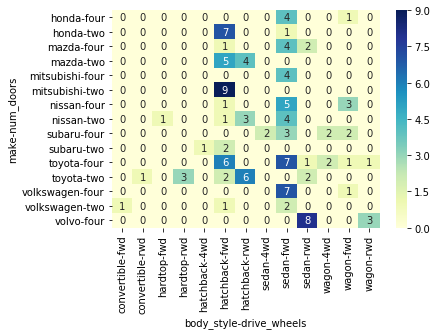

In [ ]:
import seaborn as sns
sns.heatmap(pd.crosstab([df.make, df.num_doors], [df.body_style, df.drive_wheels]), 
            cmap = 'YlGnBu', annot=True, cbar = True);

# Using groupby() method

https://www.ritchieng.com/pandas-groupby/

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url = 'http://bit.ly/drinksbycountry'
drinks = pd.read_csv(url)

In [ ]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [ ]:
# getting mean of a column
drinks['beer_servings'].mean()

106.16062176165804

In [ ]:
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

**accessing all of Africa in the column "continent"**

In [ ]:
drinks[drinks['continent']=='Africa'].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,Africa
4,Angola,217,57,45,5.9,Africa
18,Benin,34,4,13,1.1,Africa
22,Botswana,173,35,35,5.4,Africa
26,Burkina Faso,25,7,7,4.3,Africa


In [ ]:
drinks[drinks['continent']=='Africa'].mean()

beer_servings                   61.471698
spirit_servings                 16.339623
wine_servings                   16.264151
total_litres_of_pure_alcohol     3.007547
dtype: float64

In [ ]:
drinks[drinks.continent=='Europe'].beer_servings.mean()

193.77777777777777

## Groupby max() and min()

In [ ]:
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [ ]:
drinks.groupby('continent').beer_servings.min()

continent
Africa            0
Asia              0
Europe            0
North America     1
Oceania           0
South America    93
Name: beer_servings, dtype: int64

# Aggregate findings

In [ ]:
drinks.groupby('continent').beer_servings.agg(['count', 'min', 'max', 'mean', 'median'])

,count,min,max,mean,median
continent,,,,,
Africa,53,0,376,61.471698,32.0
Asia,44,0,247,37.045455,17.5
Europe,45,0,361,193.777778,219.0
North America,23,1,285,145.434783,143.0
Oceania,16,0,306,89.687500,52.5
South America,12,93,333,175.083333,162.5


**Getting mean of all numeric columns**

In [ ]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


# Visualization

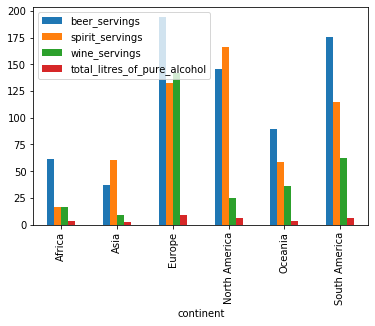

In [ ]:
drinks.groupby('continent').mean().plot(kind='bar');